# Online Shoppers Purchasing Intention Dataset


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, \
precision_score, f1_score, roc_auc_score
from sklearn.svm import SVC

dataset = pd.read_csv('./online_shoppers_intention.csv', delimiter = ',')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Encoding
We transform categorical variables into numeric variables using labelencoder.

In [5]:
mod = pd.DataFrame()
label=LabelEncoder()
for c in  dataset.columns:
    if(dataset[c].dtype=='object'):
        mod[c]=label.fit_transform(dataset[c])
    else:
        mod[c]=dataset[c]

dataset = mod
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


# EDA

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'OperatingSystems'}>],
       [<Axes: title={'center': 'Browser'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>,
        <Axes: title={'center': 'VisitorType'}>]], dtype=object)

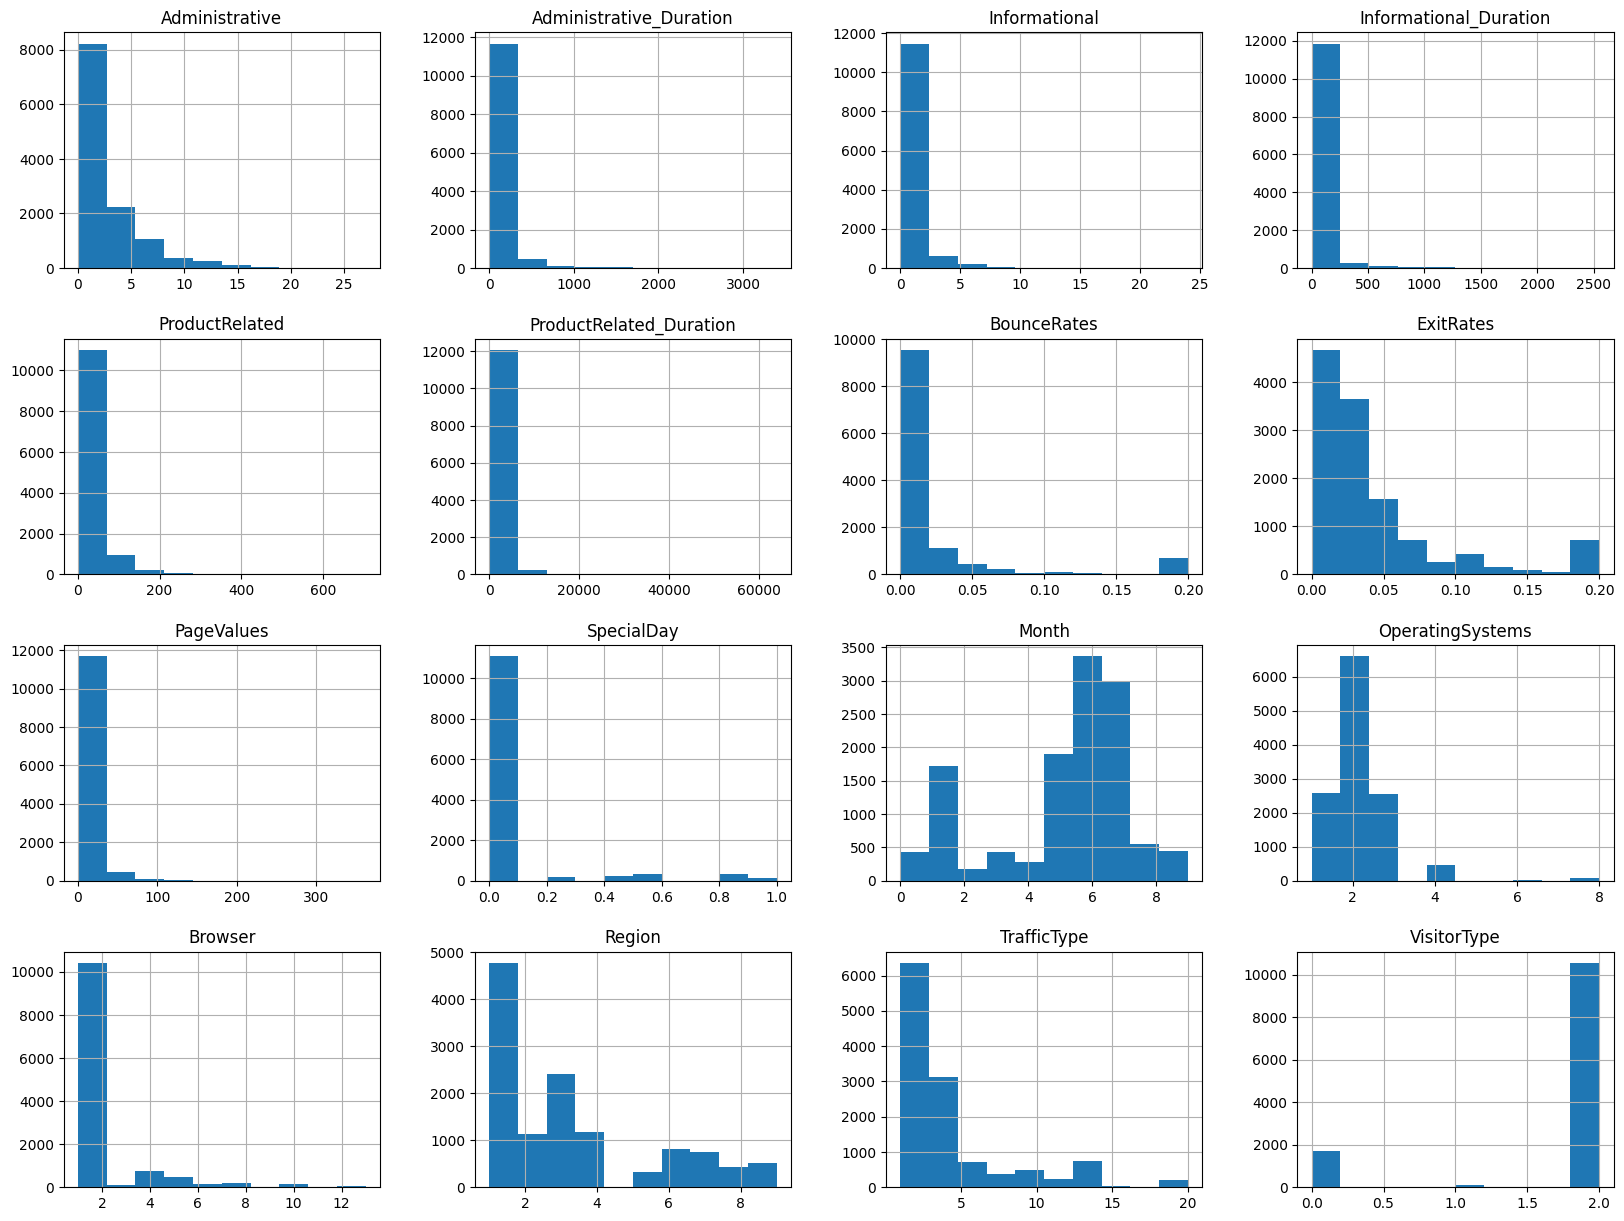

In [6]:
mod.hist(figsize=(20, 15))

<Axes: >

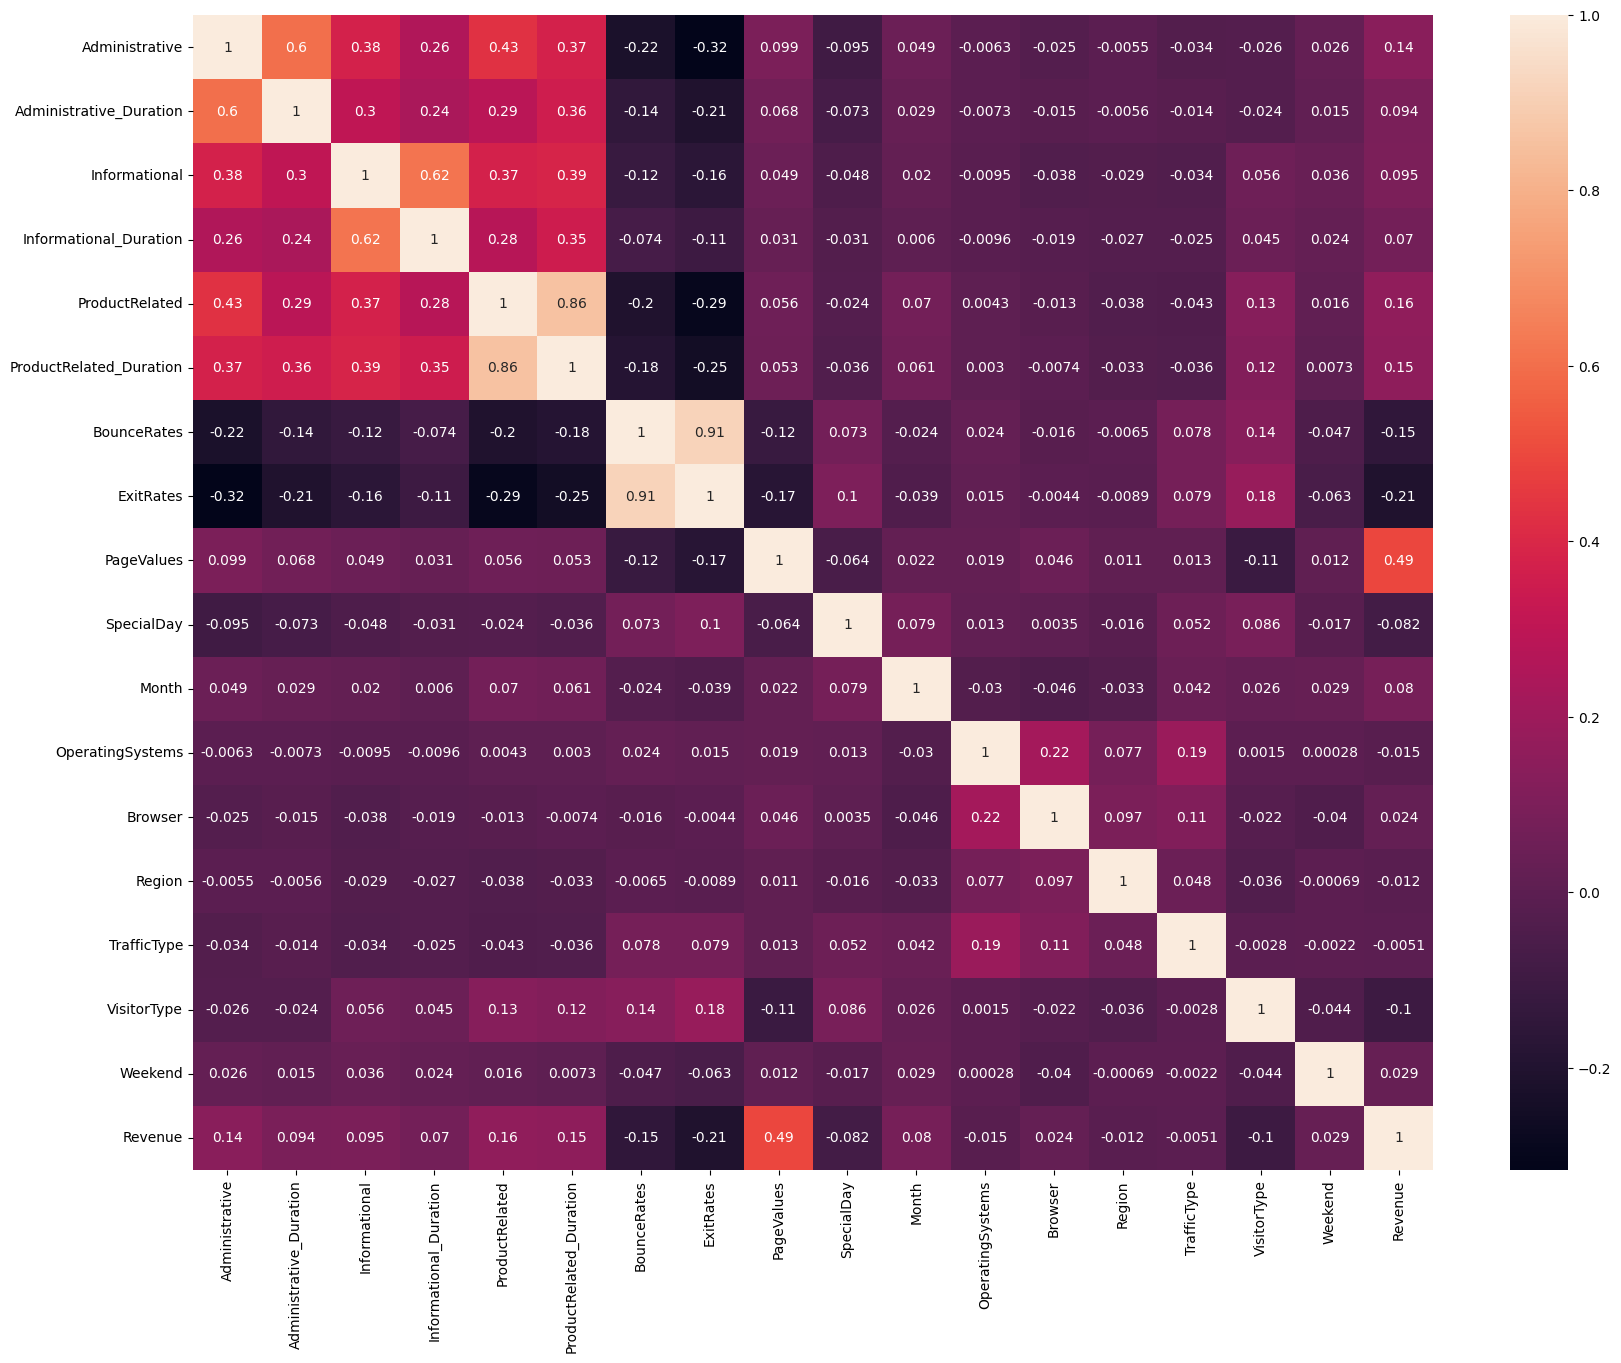

In [7]:
corr = mod.corr()  #.drop(columns=["OperatingSystems"]).corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

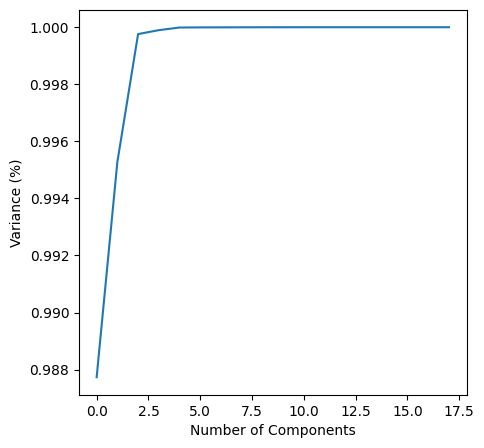

In [8]:
pca = PCA().fit(mod)
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()

In [9]:
n_components = 18
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components)], index=dataset.columns)
feature_scores = loadings_df.abs().sum(axis=1)
feature_ranking = feature_scores.sort_values(ascending=False)
selected_features = feature_ranking.head(15).index
selected_features

Index(['Month', 'Region', 'ExitRates', 'BounceRates', 'Administrative',
       'Browser', 'OperatingSystems', 'Administrative_Duration',
       'Informational_Duration', 'VisitorType', 'Informational', 'TrafficType',
       'Revenue', 'ProductRelated', 'Weekend'],
      dtype='object')

## How much do holidays influence sales?

0.16306447162696588
-
0.06189710610932476


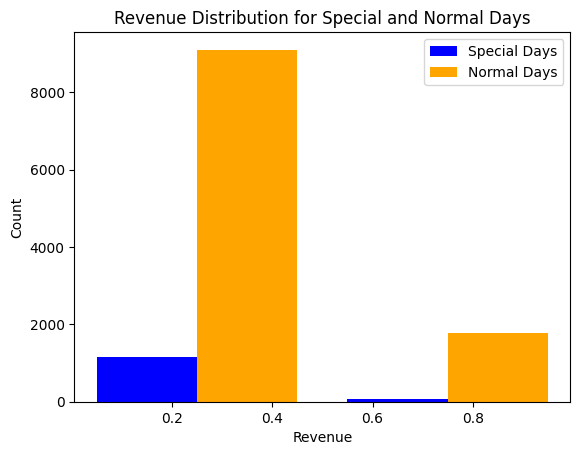

In [21]:
special_d = dataset[dataset['SpecialDay'] != 0]
normal_d = dataset[dataset['SpecialDay'] == 0]
sales_special = special_d[special_d['Revenue'] == 1]
sales_rate_special = len(sales_special) / len(special_d)
sales_normal = normal_d[normal_d['Revenue'] == 1]
sales_rate_normal = len(sales_normal) / len(normal_d)
print(sales_rate_normal)
print('-')
print (sales_rate_special)

# Create lists for revenue values for special and normal days
special_revenue = special_d['Revenue'].tolist()
normal_revenue = normal_d['Revenue'].tolist()

# Create the histogram
plt.hist([special_revenue, normal_revenue], bins=2, label=['Special Days', 'Normal Days'], color=['blue', 'orange'])
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue Distribution for Special and Normal Days')
plt.legend()
plt.show()


## Clustering

In [11]:
K = 2
scaler = StandardScaler()
scaler.fit(mod)
data_scaled = scaler.transform(mod)

In [12]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=K, init='random', n_init=1)
kmeans_model.fit(data_scaled)
y = kmeans_model.labels_

pca = PCA(n_components=2)
pca_coordinates = pca.fit_transform(data_scaled)
pca_centroids = pca.transform(kmeans_model.cluster_centers_)

C:\Users\Matteo\AppData\Local\Temp\ipykernel_6032\2657368603.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('inferno',2))


197751.89904879167


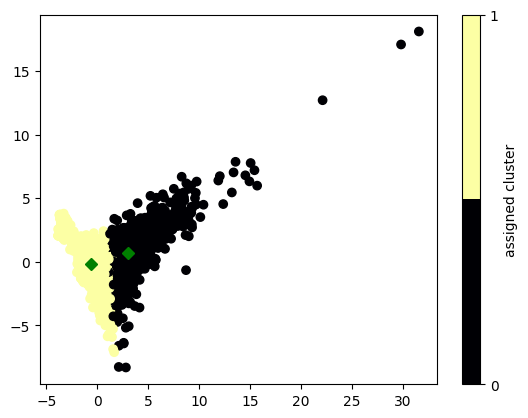

In [13]:
kmeans_model = KMeans(n_clusters=K, init='random', n_init=10)
kmeans_model.fit(data_scaled)
y = kmeans_model.labels_
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y,\
            cmap=plt.cm.get_cmap('inferno',2))
plt.colorbar(ticks=range(5), label='assigned cluster')
for i in range(K):
    plt.plot(pca_centroids[i,0], pca_centroids[i,1] ,'gD') 
print(kmeans_model.inertia_)

overall clustering silhouette 0.2491733382577862


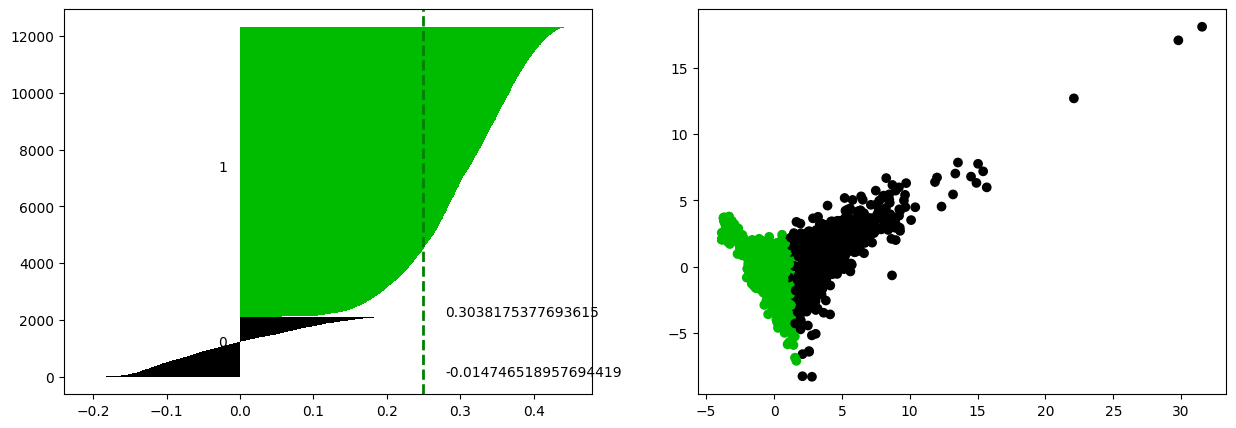

In [14]:
from matplotlib import cm

silhouette_avg = silhouette_score(data_scaled, y)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0
y_upper = 0
for i,cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, edgecolor='none', color=cm.nipy_spectral(float(i) / K))
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)

## Data cleaning
Eliminiamo le feature altamente correlate tra loro. Come visto dalla heatmap c'è una alta correlazione tra le feature "Bounce" e "Exit". C'è da notare inoltre che il numero di zeri nel target è molto più alto degli uni.Quindi il dataset è sbilanciato.


### Rimozione degli outliers

In [15]:
ad_mean = np.mean(dataset['Administrative'])
ad_std = np.std(dataset['Administrative'])

id_mean = np.mean(dataset['Informational_Duration'])
id_std = np.std(dataset['Informational_Duration'])


pr_mean = np.mean(dataset['ProductRelated'])
pr_std = np.std(dataset['ProductRelated'])

# Calcolo delle Z-Score
dataset['z_score_ad'] = (dataset['Administrative'] - ad_mean) / ad_std
#dataset['z_score_id'] = (dataset['Informational_Duration'] - id_mean) / id_std
#dataset['z_score_pr'] = (dataset['ProductRelated'] - pr_mean) / pr_std

# Rimuovere gli outliers
df_cleaned = dataset[(dataset['z_score_ad'] > -3) & (dataset['z_score_ad'] < 3)]
dataset = df_cleaned
#df_cleaned = dataset[(dataset['z_score_id'] > -3) & (dataset['z_score_id'] < 3)]
#dataset = df_cleaned
#df_cleaned = dataset[(dataset['z_score_pr'] > -3) & (dataset['z_score_pr'] < 3)]
#df_cleaned = dataset.drop(columns=['z_score_ad','z_score_id','z_score_pr']) 
#dataset = df_cleaned
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,z_score_ad
count,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000
mean,2.084509,73.914505,0.466947,31.663608,30.304696,1140.039383,0.022474,0.043499,5.799002,0.062128,5.156970,2.122308,2.359165,3.148634,4.070727,1.714286,-0.069440
std,2.831015,161.880553,1.186268,133.736172,41.197434,1761.661330,0.048858,0.048895,18.470223,0.199940,2.366673,0.911517,1.722228,2.403113,4.022965,0.694912,0.852292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.696993
25%,0.000000,0.000000,0.000000,0.000000,7.000000,180.500000,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,-0.696993
50%,1.000000,5.000000,0.000000,0.000000,17.000000,584.595887,0.003044,0.025575,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,-0.395938
75%,3.000000,87.000000,0.000000,0.000000,37.000000,1417.666667,0.017241,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.206173
max,12.000000,3398.750000,16.000000,2549.375000,534.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,2.915670


In [16]:
x = dataset[['Month', 'Region','ExitRates','Administrative']]
y = dataset['Revenue']
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
#print(x_train.shape)

# Supervised learning

## Logistic Regression

In [17]:
logreg_model = LogisticRegression(max_iter=1000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=5)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

logreg_model.fit(x_train_res,y_train_res)
print(f'\u03B20 and \u03B21 are {logreg_model.intercept_} and {logreg_model.coef_}')

β0 and β1 are [0.09382315] and [[  0.08267568  -0.02350381 -20.5774755    0.05959561]]


In [18]:

# Riduzione della dimensionalità con PCA
pca = PCA(n_components=4)
x_train_res_pca = pca.fit_transform(x_train_res)
x_test_pca = pca.transform(x_test)

# Creazione e addestramento del modello di regressione logistica
logreg_model = LogisticRegression()
logreg_model.fit(x_train_res_pca, y_train_res)

y_pre_test = logreg_model.predict(x_test_pca)

# Valutazione del modello
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pre_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pre_test))

Confusion Matrix:
[[1702 1379]
 [ 127  428]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.55      0.69      3081
        True       0.24      0.77      0.36       555

    accuracy                           0.59      3636
   macro avg       0.58      0.66      0.53      3636
weighted avg       0.82      0.59      0.64      3636



## SVM

In [19]:
svm_model = SVC()
svm_model.fit(x_train_res,y_train_res)
y_predicted_train = svm_model.predict(x_train_res)
y_predicted_test = svm_model.predict(x_test)

training_acc = accuracy_score(y_train_res, y_predicted_train)
training_ba = balanced_accuracy_score(y_train_res, y_predicted_train)
training_recall = recall_score(y_train_res, y_predicted_train)
training_precision = precision_score(y_train_res, y_predicted_train)
training_f1 = f1_score(y_train_res, y_predicted_train)
training_roc_auc = roc_auc_score(y_train_res, y_predicted_train)

testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test)
testing_precision = precision_score(y_test, y_predicted_test)
testing_f1 = f1_score(y_test, y_predicted_test)
testing_roc_auc = roc_auc_score(y_test, y_predicted_test)

print('           ACC    BA    RECALL        PRECISION  F1           ROC-AUC')
print(f'training {training_acc:.3f},\t{training_ba:.3f},\t{training_recall:.3f},\t\t{training_precision:.3f},\t{training_f1:.3f},\t\t{training_roc_auc:.3f}')
print(f'testing  {testing_acc:.3f},\t{testing_ba:.3f},\t{testing_recall:.3f},\t\t{testing_precision:.3f},\t{testing_f1:.3f},\t\t{testing_roc_auc:.3f}')


           ACC    BA    RECALL        PRECISION  F1           ROC-AUC
training 0.626,	0.626,	0.704,		0.609,	0.653,		0.626
testing  0.564,	0.621,	0.705,		0.216,	0.330,		0.621
